## Description
#### Context
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

#### Objective
<b>To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.</b>

#### Data Description
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

#### Data Dictionary
- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
- Price: The price of the used car in INR Lakhs

In [1]:
# import necessary libraries 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option("display.max_columns", None)

In [2]:
# load input dataset

df = pd.read_csv('used_cars_data.csv')

In [3]:
# make a copy of dataset

df_backup = df.copy()

In [4]:
# check the shape of the dataset

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 7253 rows and 14 columns.


In [5]:
# review sample data

df.sample(10,random_state=1)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,35.29,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,8.23,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,67.10,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,10.25,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36,8.20


Looking at the first few rows and sample, S.No is not adding any value for our analysis, and hence can be dropped. 

In [6]:
# dropping S.no as it is just a sequence number which is already available as index

df.drop(['S.No.'],axis=1,inplace=True)

In [7]:
# check for duplicates

df.duplicated().sum()

1

In [8]:
# dropping duplicates

df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)

In [9]:
# shape of the data

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 7252 rows and 13 columns.


In [10]:
# check column datatypes and number of non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Mileage            7250 non-null   object 
 8   Engine             7206 non-null   object 
 9   Power              7077 non-null   object 
 10  Seats              7199 non-null   float64
 11  New_Price          7252 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 736.7+ KB


couple of things to notice from above data and instructions provided in FAQs

Columns which needs more analysis in terms of data format
- Mileage - per instructions, no need for any conversion, just strip off units
- Engine - convert into numerical type
- Power - convert into numerical type
- Seats - will evaluate if need to convert to categorical or keep it same

columns with missing values - need analysis
- Mileage
- Engine
- Power
- Seats
- Price

categorical columns - looks good
- Location, Fuel_Type, Transmission, Owner_Type

numerical columns - looks good
- Year (int - no issues, no need to convert into datetime
- Kilometers_Driven (int - no issues) 
- New_Price - keep it same for now, will see if we need to do anything later
- Price - keep it same for now, will see if we need to do anything later

### Work on data format issues

In [11]:
# convert Engine into Numerical Column

def engine_to_num(engine_val):
    if isinstance(engine_val,str):
        return float(engine_val.replace(' CC',''))
    else:
        return np.nan

df['Engine'] = df['Engine'].apply(engine_to_num)

# we will look at evaluating 

In [12]:
# Mileage - per instructions, no need for any conversion, just strip off units

def mileage_to_num(mileage_val):
    if isinstance(mileage_val,str):
        return float(mileage_val.split(' ')[0])
    else:
        return np.nan

df['Mileage'] = df['Mileage'].apply(mileage_to_num)

In [13]:
# Power - convert into numerical column - reuse mileage_to_num function

df['Power'] = df['Power'].apply(mileage_to_num) # reusing existing function

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Mileage            7250 non-null   float64
 8   Engine             7206 non-null   float64
 9   Power              7077 non-null   float64
 10  Seats              7199 non-null   float64
 11  New_Price          7252 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.7+ KB


### Missing Value Treatment

In [15]:
# check for missing information

df.isnull().sum().sort_values(ascending=False)

Price                1233
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

5 columns have missing values, lets explore each of them and take appropriate actions

Since Price dependent variable, lets drop missing rows

In [16]:
# dropping rows where price is missing

df.dropna(subset=['Price'],axis=0,inplace=True)

In [17]:
# check for missing information

df.isnull().sum().sort_values(ascending=False)

Power                143
Seats                 42
Engine                36
Mileage                2
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
New_Price              0
Price                  0
dtype: int64

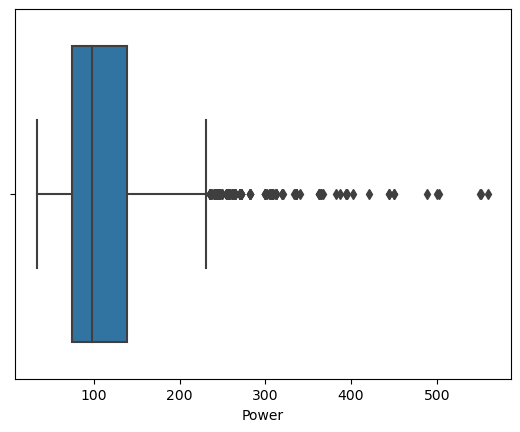

In [18]:
# Treat the missing value of Power
# check the distribution of Power

sns.boxplot(data=df,x='Power');

* Data is right skewed and it is numerical, so we will replace missing values by median
* It will be intestinging to see the categories for which power is missing

In [19]:
# Lets check the distribution of Transmission when the Power data is missing

df_Power_miss = df[df['Power'].isna()]
df_Power_miss[['Transmission']].value_counts(normalize=True)

Transmission
Manual          0.888112
Automatic       0.111888
dtype: float64

Since almost 89% of the rows are of Manual transmission type, it will better to replace the missing values by Median of Power for Manual Transmission type

In [20]:
# Lets check the distribution of Fuel_Type when the Power data is missing

df_Power_miss[['Fuel_Type']].value_counts(normalize=True)

Fuel_Type
Petrol       0.629371
Diesel       0.363636
CNG          0.006993
dtype: float64

Since almost 63% of the rows are of Petrol Fuel type, it will better to replace the missing values by Median of Power for Petrol Fuel type

In [21]:
df.groupby(['Transmission','Fuel_Type'])[['Power']].describe()

Power                                                 \
                         count        mean        std    min      25%     50%   
Transmission Fuel_Type                                                          
Automatic    Diesel     1099.0  183.134586  46.562644  73.75  153.860  177.00   
             Electric      2.0   57.000000  22.627417  41.00   49.000   57.00   
             Petrol      603.0  139.414229  78.382102  37.48   83.100  118.00   
Manual       CNG          55.0   64.830909  17.076910  38.40   58.160   58.20   
             Diesel     2054.0   98.351339  28.177212  35.50   74.000   89.84   
             LPG          10.0   59.915000   3.700154  55.20   57.675   58.20   
             Petrol     2053.0   84.681310  24.694988  34.20   68.000   81.86   

                                       
                          75%     max  
Transmission Fuel_Type                 
Automatic    Diesel     201.1  394.30  
             Electric    65.0   73.00  
             Petrol     164.7  560.00  
Manual       CNG         73.0  138.00  
             Diesel     108.5  200.00  
             LPG         62.1   68.05  
             Petrol      93.7  210.00

In [22]:
# replacing the missing values of Power by median when Transmission is Manual and Fuel Type is Petrol

df['Power'] = df['Power'].fillna(value = df.groupby(['Transmission','Fuel_Type'])['Power'].transform('median'))

In [23]:
# lets check remaining null values

df.isnull().sum().sort_values(ascending=False)

Seats                42
Engine               36
Mileage               2
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Power                 0
New_Price             0
Price                 0
dtype: int64

In [24]:
# evaluate seats 

df.Seats.value_counts(dropna=False,normalize=True)

5.0     0.833029
7.0     0.111979
8.0     0.022263
4.0     0.016448
NaN     0.006978
6.0     0.005150
2.0     0.002658
10.0    0.000831
9.0     0.000498
0.0     0.000166
Name: Seats, dtype: float64

In [25]:
# Most of the cars are 5 seater (83%), so it will be safe to replace the missing values by 5

df['Seats'].fillna(value = 5,inplace=True)

In [26]:
# lets check remaining null values

df.isnull().sum().sort_values(ascending=False)

Engine               36
Mileage               2
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Power                 0
Seats                 0
New_Price             0
Price                 0
dtype: int64

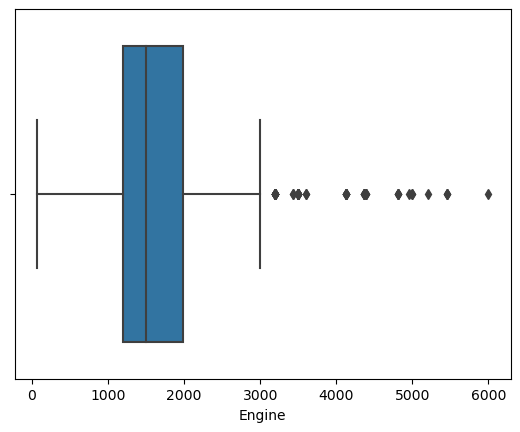

In [27]:
# lets look at engine column 

sns.boxplot(data=df,x='Engine');

Engine data is right skewed, we will replace with median

In [28]:
# Lets check the distribution of Transmission when the Power data is missing

df_engine_miss = df[df['Engine'].isna()]
df_engine_miss[['Transmission']].value_counts(normalize=True)

Transmission
Manual          0.777778
Automatic       0.222222
dtype: float64

In [29]:
df_engine_miss[['Fuel_Type']].value_counts(normalize=True)

Fuel_Type
Petrol       0.777778
Diesel       0.222222
dtype: float64

In [30]:
df_engine_miss[['Owner_Type']].value_counts(normalize=True)

Owner_Type    
First             0.611111
Second            0.305556
Third             0.055556
Fourth & Above    0.027778
dtype: float64

In [31]:
df['Engine'] = df['Engine'].fillna(value = df.groupby(['Transmission','Fuel_Type','Owner_Type'])['Engine'].transform('median'))

In [32]:
# lets check remaining null values

df.isnull().sum().sort_values(ascending=False)

Mileage              2
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [33]:
# looking at Mileage column which has least # of missing values
df[df['Mileage'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,24.01,12.75


In [34]:
df['Mileage'].describe()

count    6017.000000
mean       18.134961
std         4.582289
min         0.000000
25%        15.170000
50%        18.150000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

- Both the records are for Electric Vehicle so missing Mileage seems okay, however this column may not work during linear regression, so lets replace NaNs with mean() (mean and median are very same)
- Also notice, min value is 0, lets explore number of rows with such scenario

In [35]:
# replacing missing Mileage with zero first

df['Mileage'].fillna(value =  0,inplace=True)

now, lets look at all zero values

In [36]:
# explore rows which has mileage as zero

df[df['Mileage']==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.00,5.0,120.000,17.50
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.00,5.0,49.140,35.67
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,81.86,5.0,4.550,1.30
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,1197.0,81.86,5.0,13.580,2.95
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.00,5.0,7.650,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,0.0,2446.0,89.84,8.0,24.010,2.20
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0,1950.0,194.00,5.0,49.140,35.00
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0,2112.0,89.84,6.0,18.865,1.70
5972,Hyundai Santro Xing GL,Mumbai,2008,65000,Petrol,Manual,Second,0.0,1086.0,62.00,5.0,4.550,1.39


* There are 70 rows with zero mileage, 

In [37]:
df.groupby(['Transmission','Fuel_Type'])[['Mileage']].describe()

Mileage                                              \
                         count       mean       std    min      25%    50%   
Transmission Fuel_Type                                                       
Automatic    Diesel     1108.0  15.697960  4.152820   0.00  12.8000  16.00   
             Electric      2.0   0.000000  0.000000   0.00   0.0000   0.00   
             Petrol      610.0  15.759115  4.068798   0.00  12.9575  15.60   
Manual       CNG          56.0  25.418036  5.953456  13.20  22.1000  26.60   
             Diesel     2097.0  20.164669  4.651179   0.00  16.5500  20.77   
             LPG          10.0  19.385000  5.340363  13.45  14.4125  18.25   
             Petrol     2136.0  17.888151  3.609658   0.00  16.4700  18.20   

                                        
                            75%    max  
Transmission Fuel_Type                  
Automatic    Diesel     18.1200  28.40  
             Electric    0.0000   0.00  
             Petrol     18.9000  24.07  
Manual       CNG        27.7375  33.54  
             Diesel     23.5000  28.40  
             LPG        24.9250  26.20  
             Petrol     19.7000  26.00

comparing mean and median, they appear close to each other for all the variants, so we will replace missing mileage with mean

In [38]:
df['Mileage'].replace(0,df['Mileage'].mean(),inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  New_Price          6019 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 658.3+ KB


### Exploratory Data Analysis

In [40]:
# get all categorical variables and analyse them

obj_cols = list(df.columns[df.dtypes=='object'])

obj_cols.remove('Name') # Name doesn't seem to give any insight

for cols in obj_cols:
    print(df[cols].value_counts(normalize=True))
    print('\n')

Mumbai        0.131251
Hyderabad     0.123276
Kochi         0.108158
Coimbatore    0.105665
Pune          0.103339
Delhi         0.092042
Kolkata       0.088885
Chennai       0.082073
Jaipur        0.068616
Bangalore     0.059478
Ahmedabad     0.037215
Name: Location, dtype: float64


Diesel      0.532480
Petrol      0.456222
CNG         0.009304
LPG         0.001661
Electric    0.000332
Name: Fuel_Type, dtype: float64


Manual       0.714238
Automatic    0.285762
Name: Transmission, dtype: float64


First             0.818907
Second            0.160824
Third             0.018774
Fourth & Above    0.001495
Name: Owner_Type, dtype: float64




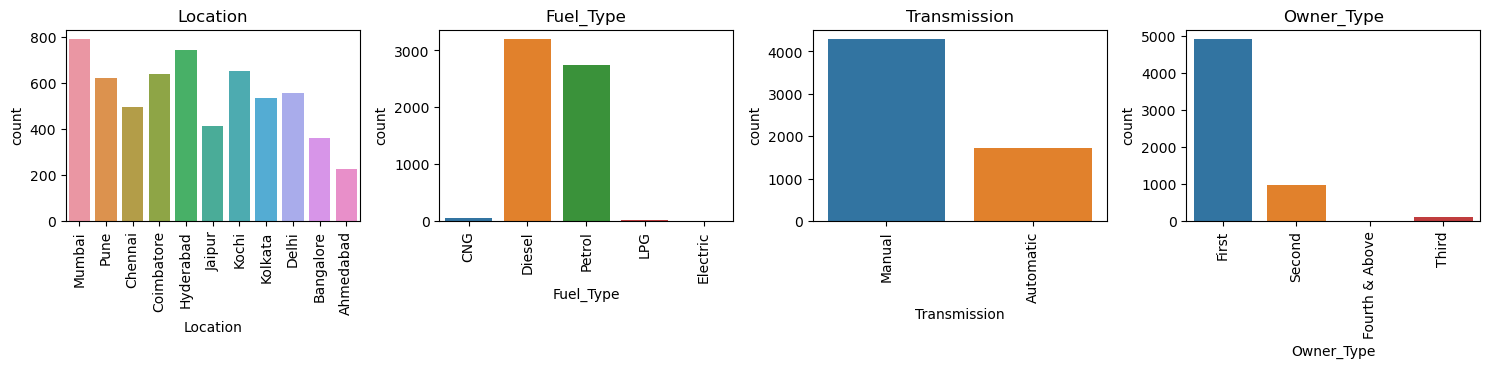

In [41]:
# build count plots for all categorical variables 

plt.figure(figsize=(15, 12))

for i, variable in enumerate(obj_cols):
    plt.subplot(4, 4, i + 1)
    sns.countplot(data=df,x=variable)
    plt.tight_layout()
    plt.title(variable)
    plt.xticks(rotation=90)
plt.show()

#### Key Observations
* Top 5 Locations where cars are being sold or is available for purchase are Mumbai, Hyderabad, Kochi, Coimbatore & Pune. Although other cities like Delhi, Kolkata and Chennai have comparable markets
* Diesel (53.2%) and Petrol (45.6%) constitutes most of the sale. CNG, LPG and Electric sales are negligible
* Manual Car (71.4%) sales are way higher than Automatic Car Sales (28.6%)
* 81% of cars being sold or available for sale are having First Owner Type, followed by Second (16%). There are negligible cars having third and higher owner types

#### lets analyze Name column which contains brand name and model name

In [42]:
print(f"There are {df['Name'].nunique()} unique car names")

There are 1876 unique car names


In [43]:
# print top 10 cars 

df['Name'].value_counts()[:10]

Mahindra XUV500 W8 2WD        49
Maruti Swift VDI              45
Honda City 1.5 S MT           34
Maruti Swift Dzire VDI        34
Maruti Swift VDI BSIV         31
Maruti Ritz VDi               30
Hyundai i10 Sportz            30
Toyota Fortuner 3.0 Diesel    29
Honda Amaze S i-Dtech         27
Hyundai Grand i10 Sportz      27
Name: Name, dtype: int64

In [44]:
# split car name into car brand, car model and rest

df[['car_brand','car_model','car_style']] = df.Name.str.title().str.split(' ',n=2,expand=True)

In [45]:
# drop Name column 

df.drop(columns=['Name'],inplace=True)

In [46]:
print(f"There are {df['car_brand'].nunique()} car brands")

There are 30 car brands


In [47]:
df.car_brand.value_counts(normalize=True)[:5]

Maruti           0.201196
Hyundai          0.183918
Honda            0.101013
Toyota           0.068284
Mercedes-Benz    0.052833
Name: car_brand, dtype: float64

In [48]:
df.car_brand.value_counts(normalize=True)[:5].sum()

0.6072437281940521

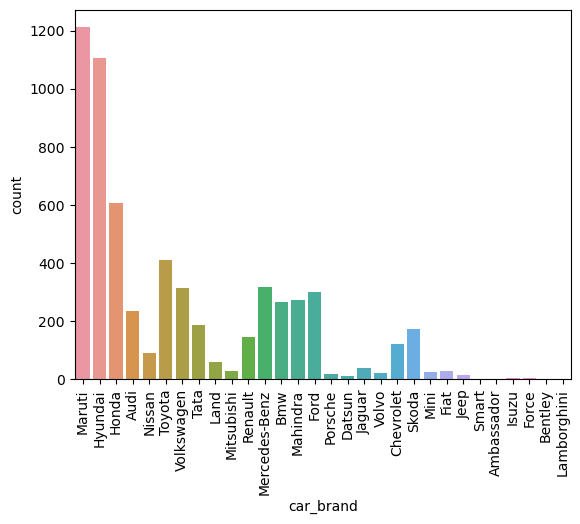

In [49]:
sns.countplot(data=df,x='car_brand');
plt.xticks(rotation=90);

#### Key Observation 
Top 5 cars sold or available for sale which constitute around 60.7% of the total cars are:
- Maruti
- Hyundai
- Honda
- Toyota
- Mercedes-Benz

Mercedes is luxary brand and is in top 5 

In [50]:
# get all numerical variables and analyse them

num_cols = list(df.columns[df.dtypes!='object'])
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.00,53000.00,73000.00,6500000.00
Mileage,6019.0,18.339772,4.151183,6.40,15.40,18.15,21.10,33.54
Engine,6019.0,1619.917096,600.470696,72.00,1197.00,1493.00,1984.00,5998.00
Power,6019.0,112.744579,53.454645,34.20,78.00,92.00,138.10,560.00
Seats,6019.0,5.276790,0.806346,0.00,5.00,5.00,5.00,10.00
New_Price,6019.0,21.499855,24.332922,3.91,7.88,11.30,21.77,375.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


#### Key Observations
* Kilometers Driven - mean is around 58,738 km, median is 53,000 km, 75th percentile is 73,000km. Min is 171 KM (fairly new car) and max is 65,00,000 (highly unrealistic)
* Mileage - Average is 18.13, median is 18.15. Minimum is zero, probably it is electric car, we will see it later
* Engine size mean is 1620 and median is 1493, data seems right skewed. 
* Power - mean power is 112.74, median is 92, data seems right skewed. 
* New Price of the car - Average price is 21.5 lacs, median price is 11.3lacs. data is right skewed. There seems to be few really expensive cars. 
* Price of used car - Average price of used car is 9.47, median price is 5.64, again data is right skewed. 

#### Year of Manufacture

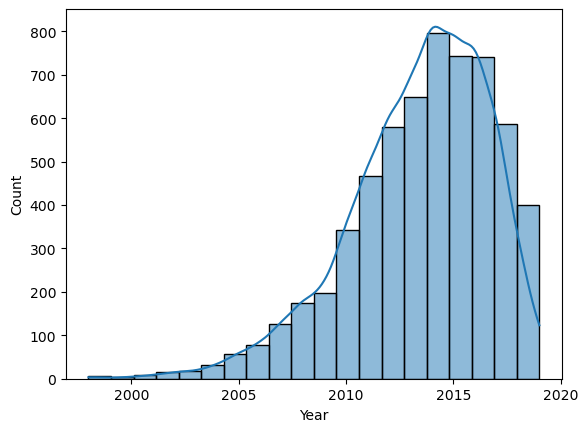

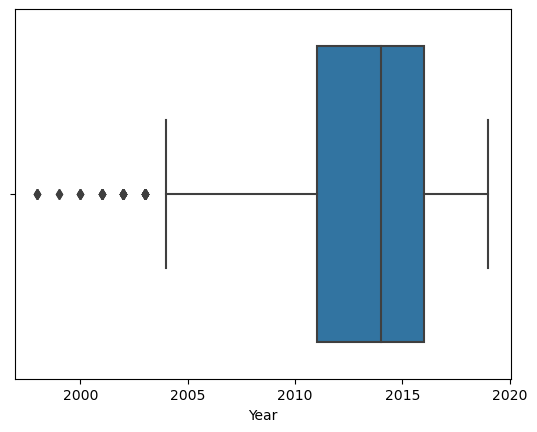

In [51]:
# Analysis on Year

sns.histplot(data=df,x='Year',bins=20,kde=True);
plt.show()
sns.boxplot(data=df,x='Year');
plt.show()

#### Key Observation
* From the data, it looks like most of the car were manufactured around year 2012-2015. Data is left skewed.

#### Kilometers Driven

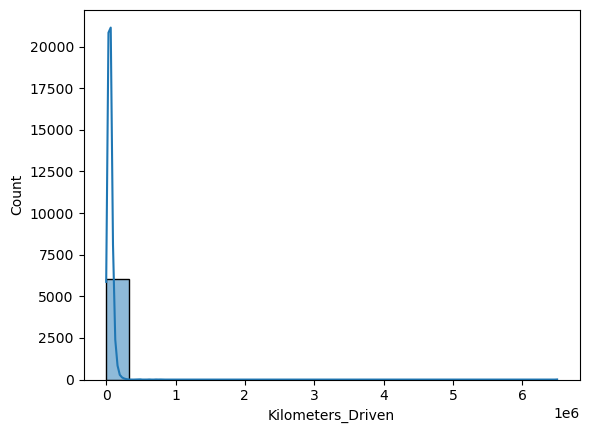

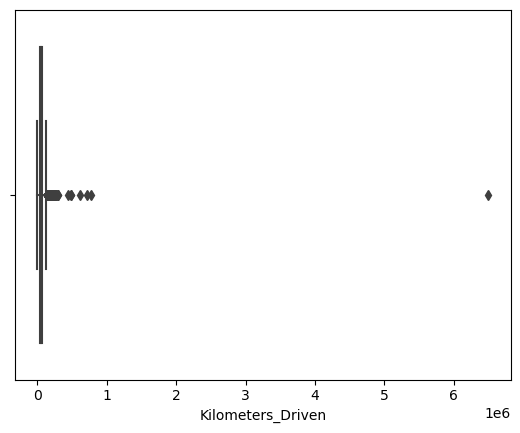

In [52]:
# Analysis on Kilometers driven

sns.histplot(data=df,x='Kilometers_Driven',bins=20,kde=True);
plt.show()
sns.boxplot(data=df,x='Kilometers_Driven');
plt.show()

#### Key Observation
* From the data, looks like Kilometers driven is right skewed. 
* Mean is 58,738.38 KM and Median is 53,000 KM, and in fact 75th percentile is around 73,000 KM
* There is a record with 65,00,000 kilometer which seems unrealistic (could be race car, participated in many races)

In [53]:
# lets check the record which has driven 65,00,000 km. 

df[df['Kilometers_Driven']==6500000]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_brand,car_model,car_style
2328,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,55.07,65.0,Bmw,X5,Xdrive 30D M Sport


Looking at this record, year of the car is 2017, it seems unreasonable that this car drove so high km, unless it was racing car. Also the used price (65 lacs) is greater than original price (55 lacs), so maybe owner upgraded the car for racing. 

Lets check other cars where used car price is greater than new car price, create a new column (price_depr) 

In [54]:
df['price_depr'] = df['New_Price'] - df['Price']

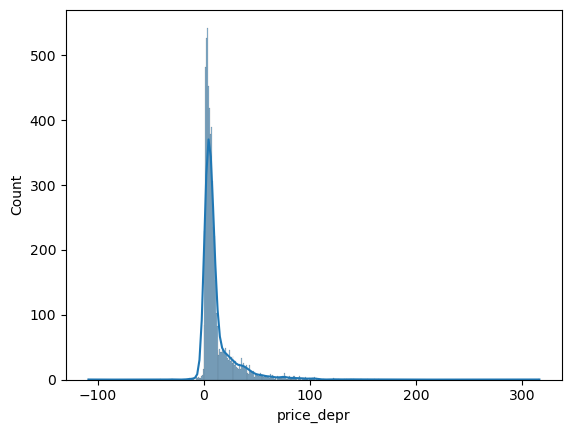

In [55]:
sns.histplot(data=df,x='price_depr',kde=True);

In [56]:
df[df['price_depr']<0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_brand,car_model,car_style,price_depr
21,Bangalore,2015,55392,Diesel,Manual,Second,23.65,1248.0,88.5,5.0,7.880,8.25,Maruti,S,Cross Ddis 200 Alpha,-0.370
392,Coimbatore,2017,56451,Diesel,Automatic,First,13.50,2987.0,282.0,5.0,49.490,62.81,Mercedes-Benz,S,Class 2005 2013 S 350 Cdi,-13.320
431,Coimbatore,2018,12831,Petrol,Automatic,First,21.40,1197.0,83.1,5.0,8.800,9.89,Maruti,Baleno,Alpha Automatic,-1.090
655,Mumbai,2017,10501,Petrol,Automatic,First,9.43,1999.0,237.4,5.0,69.675,75.00,Jaguar,Xj,2.0L Portfolio,-5.325
693,Coimbatore,2016,22732,Petrol,Automatic,First,18.10,3498.0,306.0,2.0,49.490,55.54,Mercedes-Benz,Slk-Class,Slk 350,-6.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,Jaipur,2016,70000,Diesel,Manual,First,23.65,1248.0,88.5,5.0,7.880,8.85,Maruti,Sx4,S Cross Ddis 200 Zeta,-0.970
5743,Coimbatore,2016,45794,Diesel,Automatic,First,13.01,2199.0,194.3,7.0,10.250,20.67,Hyundai,Santa,Fe 4Wd At,-10.420
5769,Coimbatore,2019,20712,Petrol,Manual,First,23.84,1199.0,84.0,5.0,6.590,6.94,Tata,Tiago,1.2 Revotron Xz,-0.350
5781,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,11.300,120.00,Lamborghini,Gallardo,Coupe,-108.700


There are 73 instances where used car price is greater than new car price. At this point, I am going to leave it here and drop this new column 

In [57]:
df.drop(['price_depr'],axis=1,inplace=True)

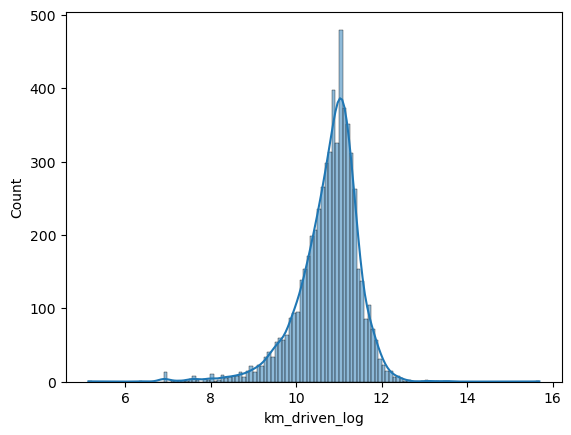

In [58]:
# check the distribution of Kilometers driven by performing log transformation

df['km_driven_log'] = np.log(df['Kilometers_Driven'])

sns.histplot(data=df,x='km_driven_log',kde=True);

After log transformation, it looks normal distribution

as of now, will keep both variable

##### Mileage 

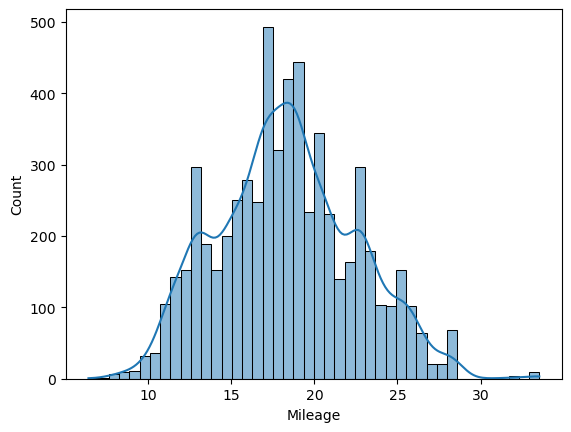

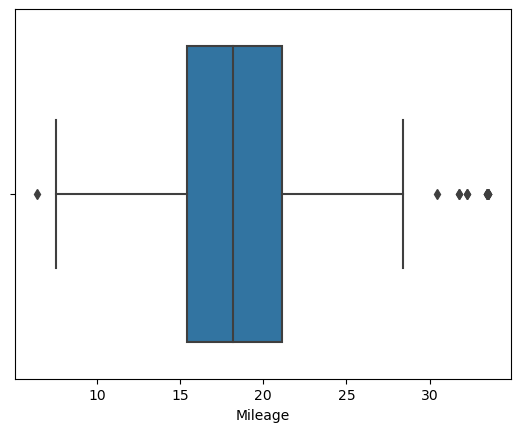

In [59]:
# lets explore mileage column 

sns.histplot(data=df,x='Mileage',kde=True);
plt.show()
sns.boxplot(data=df,x='Mileage');
plt.show()

we have outliers, lets perform log transformation and see the distribution

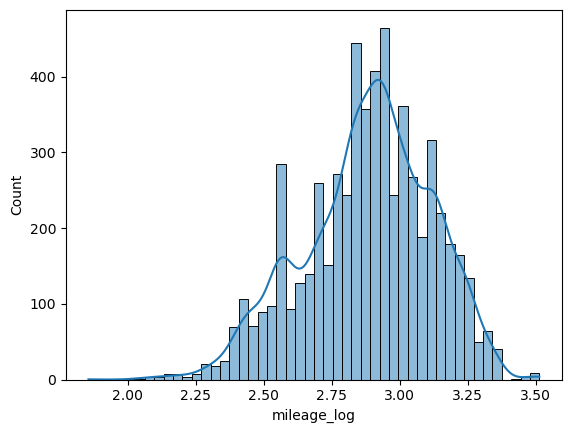

In [60]:
# check the distribution of Mileage driven by performing log transformation

df['mileage_log'] = np.log(df['Mileage'])

sns.histplot(data=df,x='mileage_log',kde=True);

#### Engine

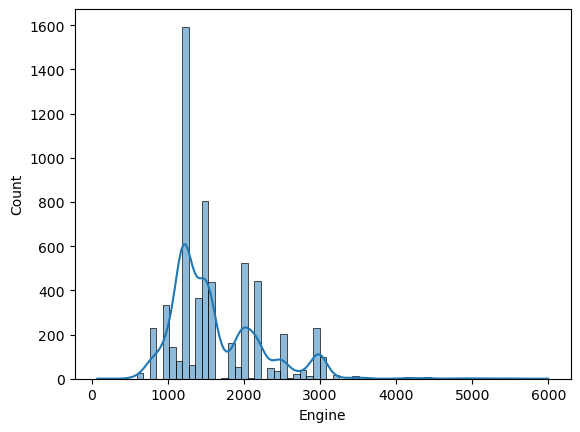

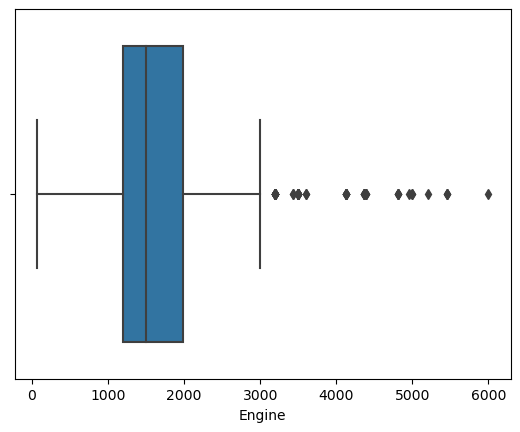

In [61]:
# lets explore Engine column 

sns.histplot(data=df,x='Engine',kde=True);
plt.show()
sns.boxplot(data=df,x='Engine');
plt.show()

Engine data is right skewed, lets perform log transformation and check the distribution

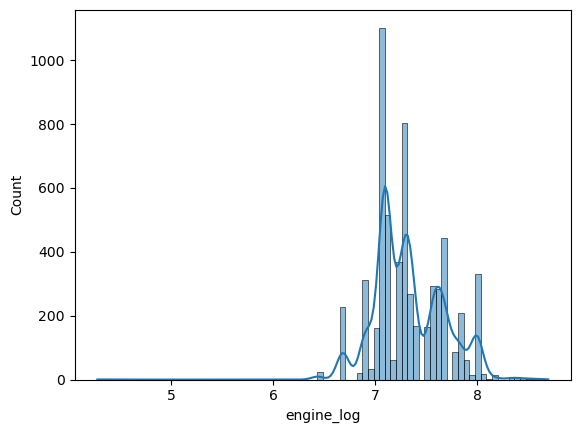

In [62]:
# check the distribution of Engine driven by performing log transformation

df['engine_log'] = np.log(df['Engine'])

sns.histplot(data=df,x='engine_log',kde=True);

#### Power Column

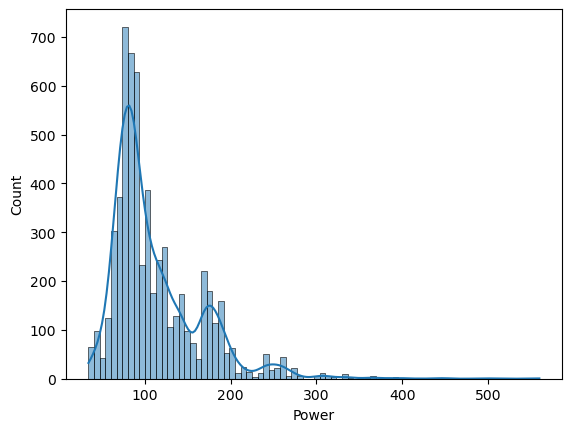

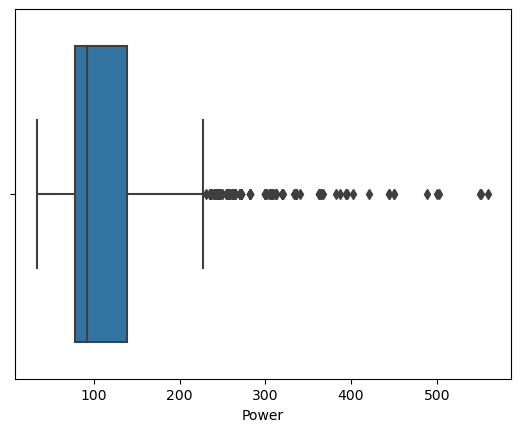

In [63]:
# lets explore Power column 

sns.histplot(data=df,x='Power',kde=True);
plt.show()
sns.boxplot(data=df,x='Power');
plt.show()

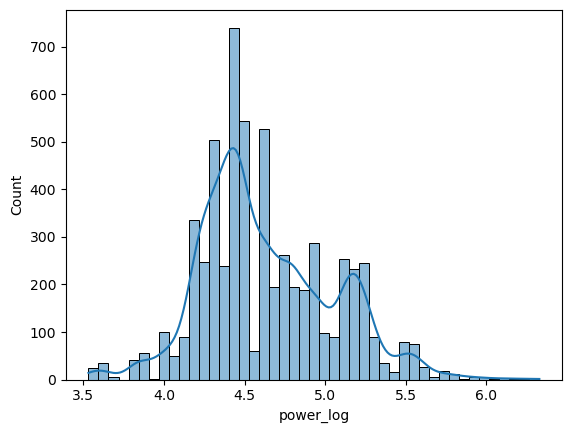

In [64]:
# performing log transforation

df['power_log'] = np.log(df['Power'])

sns.histplot(data=df,x='power_log',kde=True);

Power is right skewed. Log transformation does help a bit

#### New Price

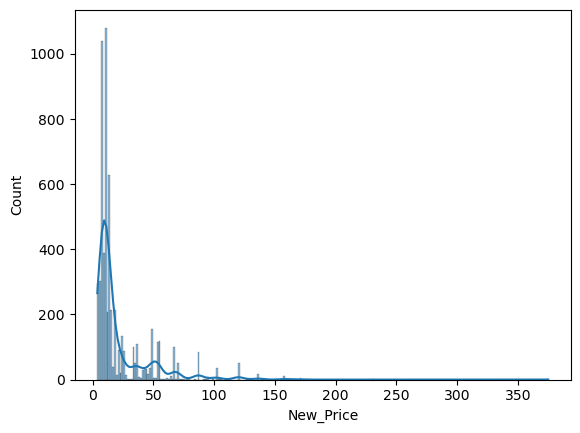

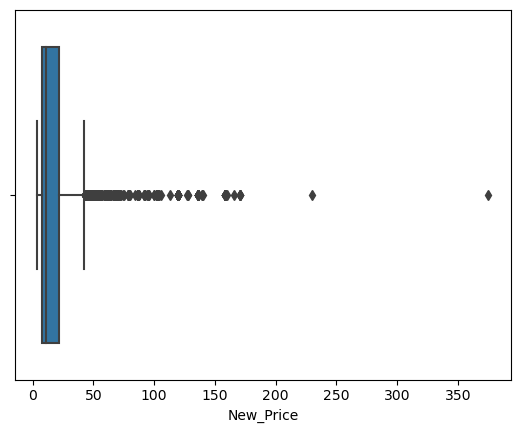

In [65]:
# lets explore New Price column 

sns.histplot(data=df,x='New_Price',kde=True);
plt.show()
sns.boxplot(data=df,x='New_Price');
plt.show()

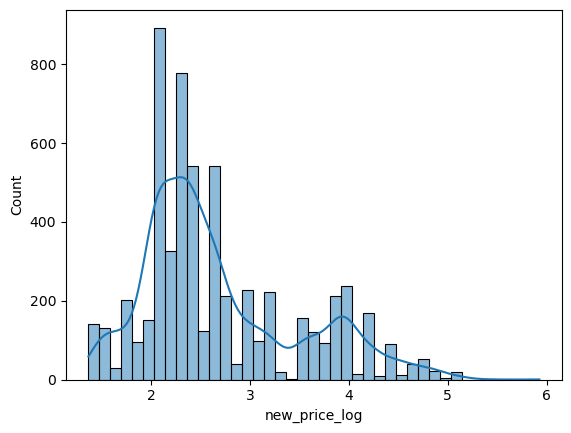

In [66]:
# performing log transformation

df['new_price_log'] = np.log(df['New_Price'])

sns.histplot(data=df,x='new_price_log',kde=True);

New Price is right skewed, performed log transformation

#### Used Car Price

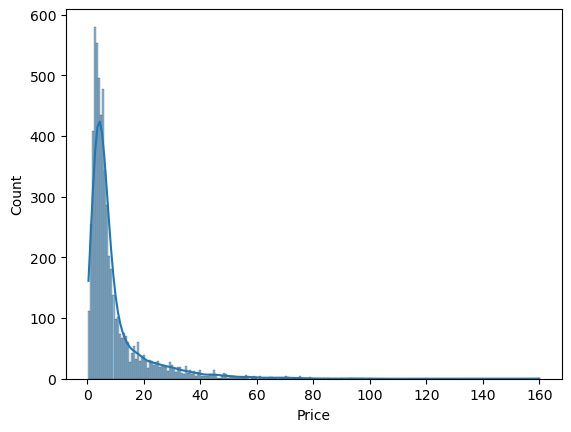

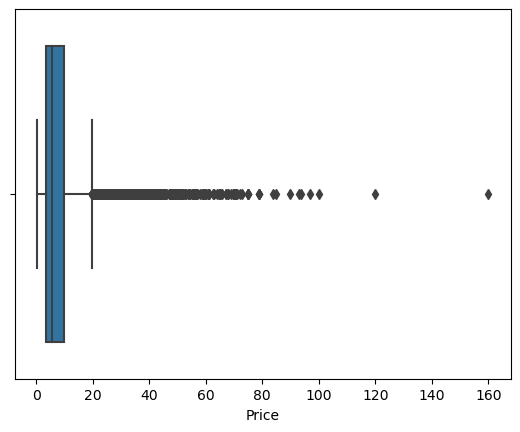

In [67]:
# lets explore Price column 

sns.histplot(data=df,x='Price',kde=True);
plt.show()
sns.boxplot(data=df,x='Price');
plt.show()

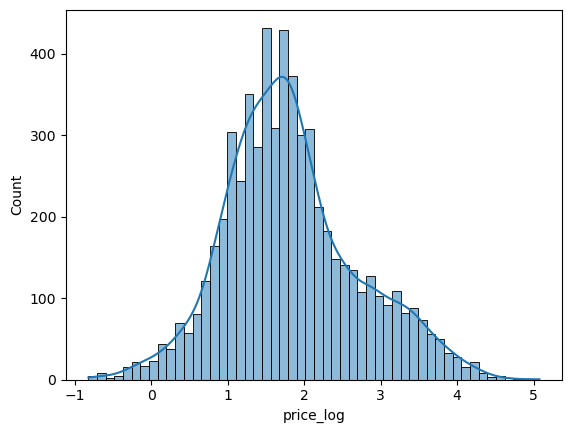

In [68]:
# perform log transformation

df['price_log'] = np.log(df['Price'])

sns.histplot(data=df,x='price_log',kde=True);

Used Car Price data is right skewed, but after log transformation distribution looks normal

### Multivariate Analysis

<AxesSubplot:xlabel='Fuel_Type', ylabel='Mileage'>

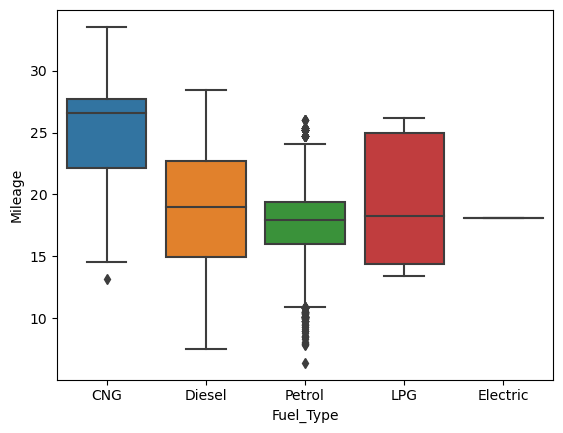

In [69]:
sns.boxplot(data=df,x='Fuel_Type',y='Mileage')

* CNG gives better Mileage

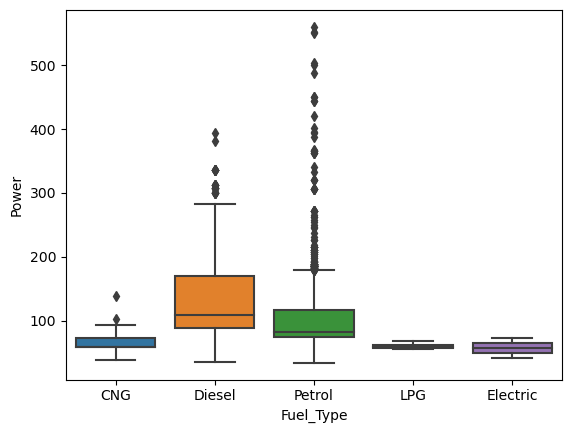

In [70]:
sns.boxplot(data=df,x='Fuel_Type',y='Power');

* Diesel Cars have higher Power

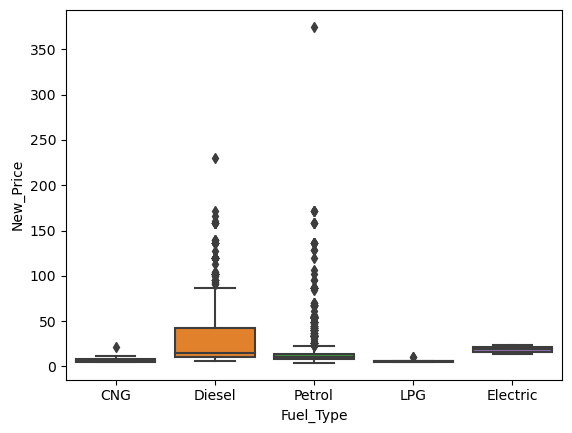

In [71]:
sns.boxplot(data=df,x='Fuel_Type',y='New_Price');

* Diesel Cars have higher new Price

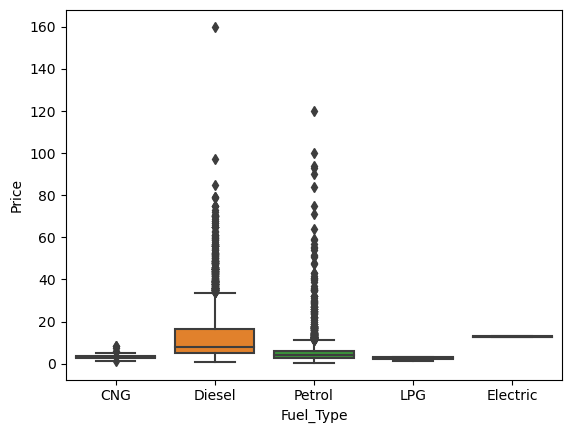

In [72]:
sns.boxplot(data=df,x='Fuel_Type',y='Price');

* Diesel cars have higher used price as well

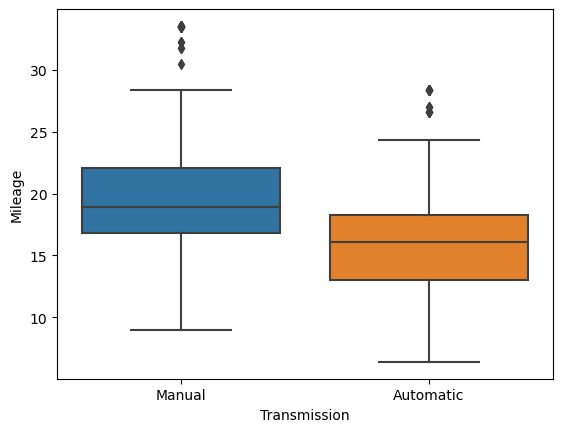

In [73]:
sns.boxplot(data=df,x='Transmission',y='Mileage');

* Manual Transmission offers higher mileage than Automatic transmission

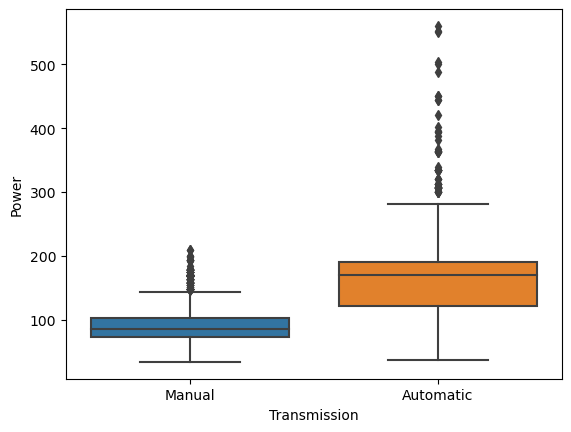

In [74]:
sns.boxplot(data=df,x='Transmission',y='Power');

* Automatic cars have higher power than manual cars

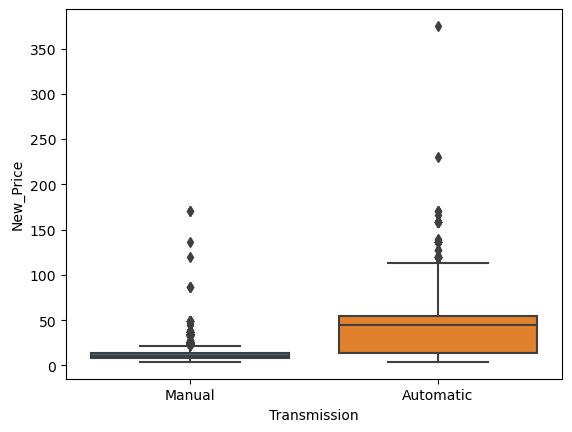

In [75]:
sns.boxplot(data=df,x='Transmission',y='New_Price');

* Automatic cars have higher new price than Manual cars

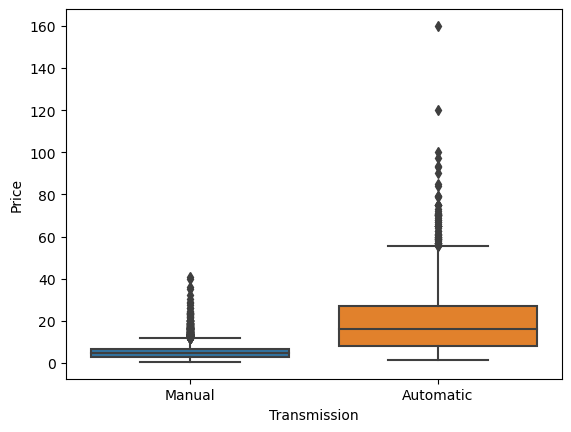

In [76]:
sns.boxplot(data=df,x='Transmission',y='Price');

* Automatic cars have higher used car price than compared to Manual cars

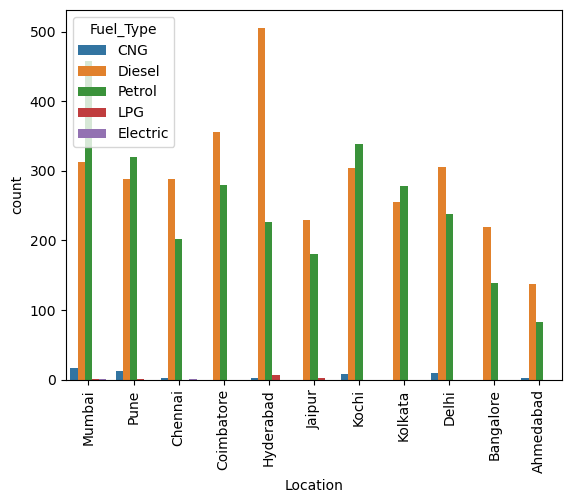

In [77]:
sns.countplot(data=df,x='Location',hue='Fuel_Type');
plt.xticks(rotation=90);

* In Mumbai, Pune, Kochi, Kolkata, people prefer Petrol cars over Diesel cars. All other location, Diesel cars are preferred over petrol cars

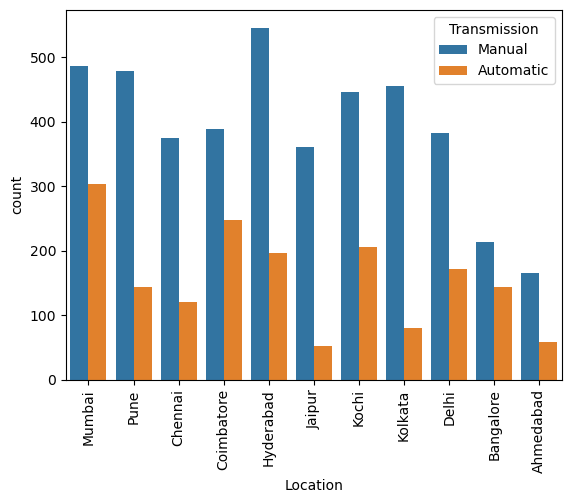

In [78]:
sns.countplot(data=df,x='Location',hue='Transmission');
plt.xticks(rotation=90);

* Manual cars are sold more over Automatic transmission at all locations

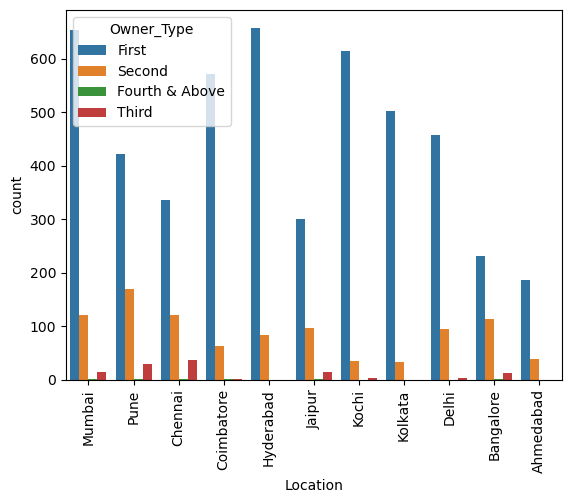

In [79]:
sns.countplot(data=df,x='Location',hue='Owner_Type');
plt.xticks(rotation=90);

* Owner Type of First dominates in all cities car sale

#### Coorelation

In [80]:
var = ['Year','Kilometers_Driven','Mileage','Engine','Power','Seats','New_Price','Price']
var_log = ['Year','km_driven_log','mileage_log','engine_log','power_log','Seats','new_price_log','price_log']

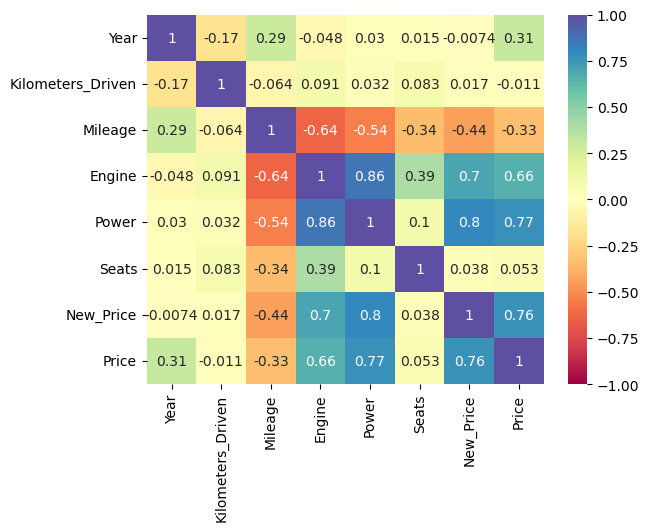

In [81]:
sns.heatmap(df[var].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);

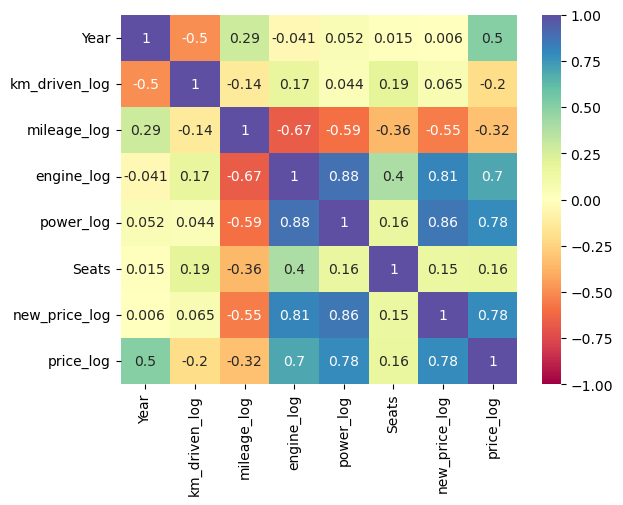

In [82]:
sns.heatmap(df[var_log].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);

* after log transformation, certain variables show better coorelation
#### Key Observations
* Price is positively coorelated to new car price, power, engine and year
* Price is negatively coorelated to mileage

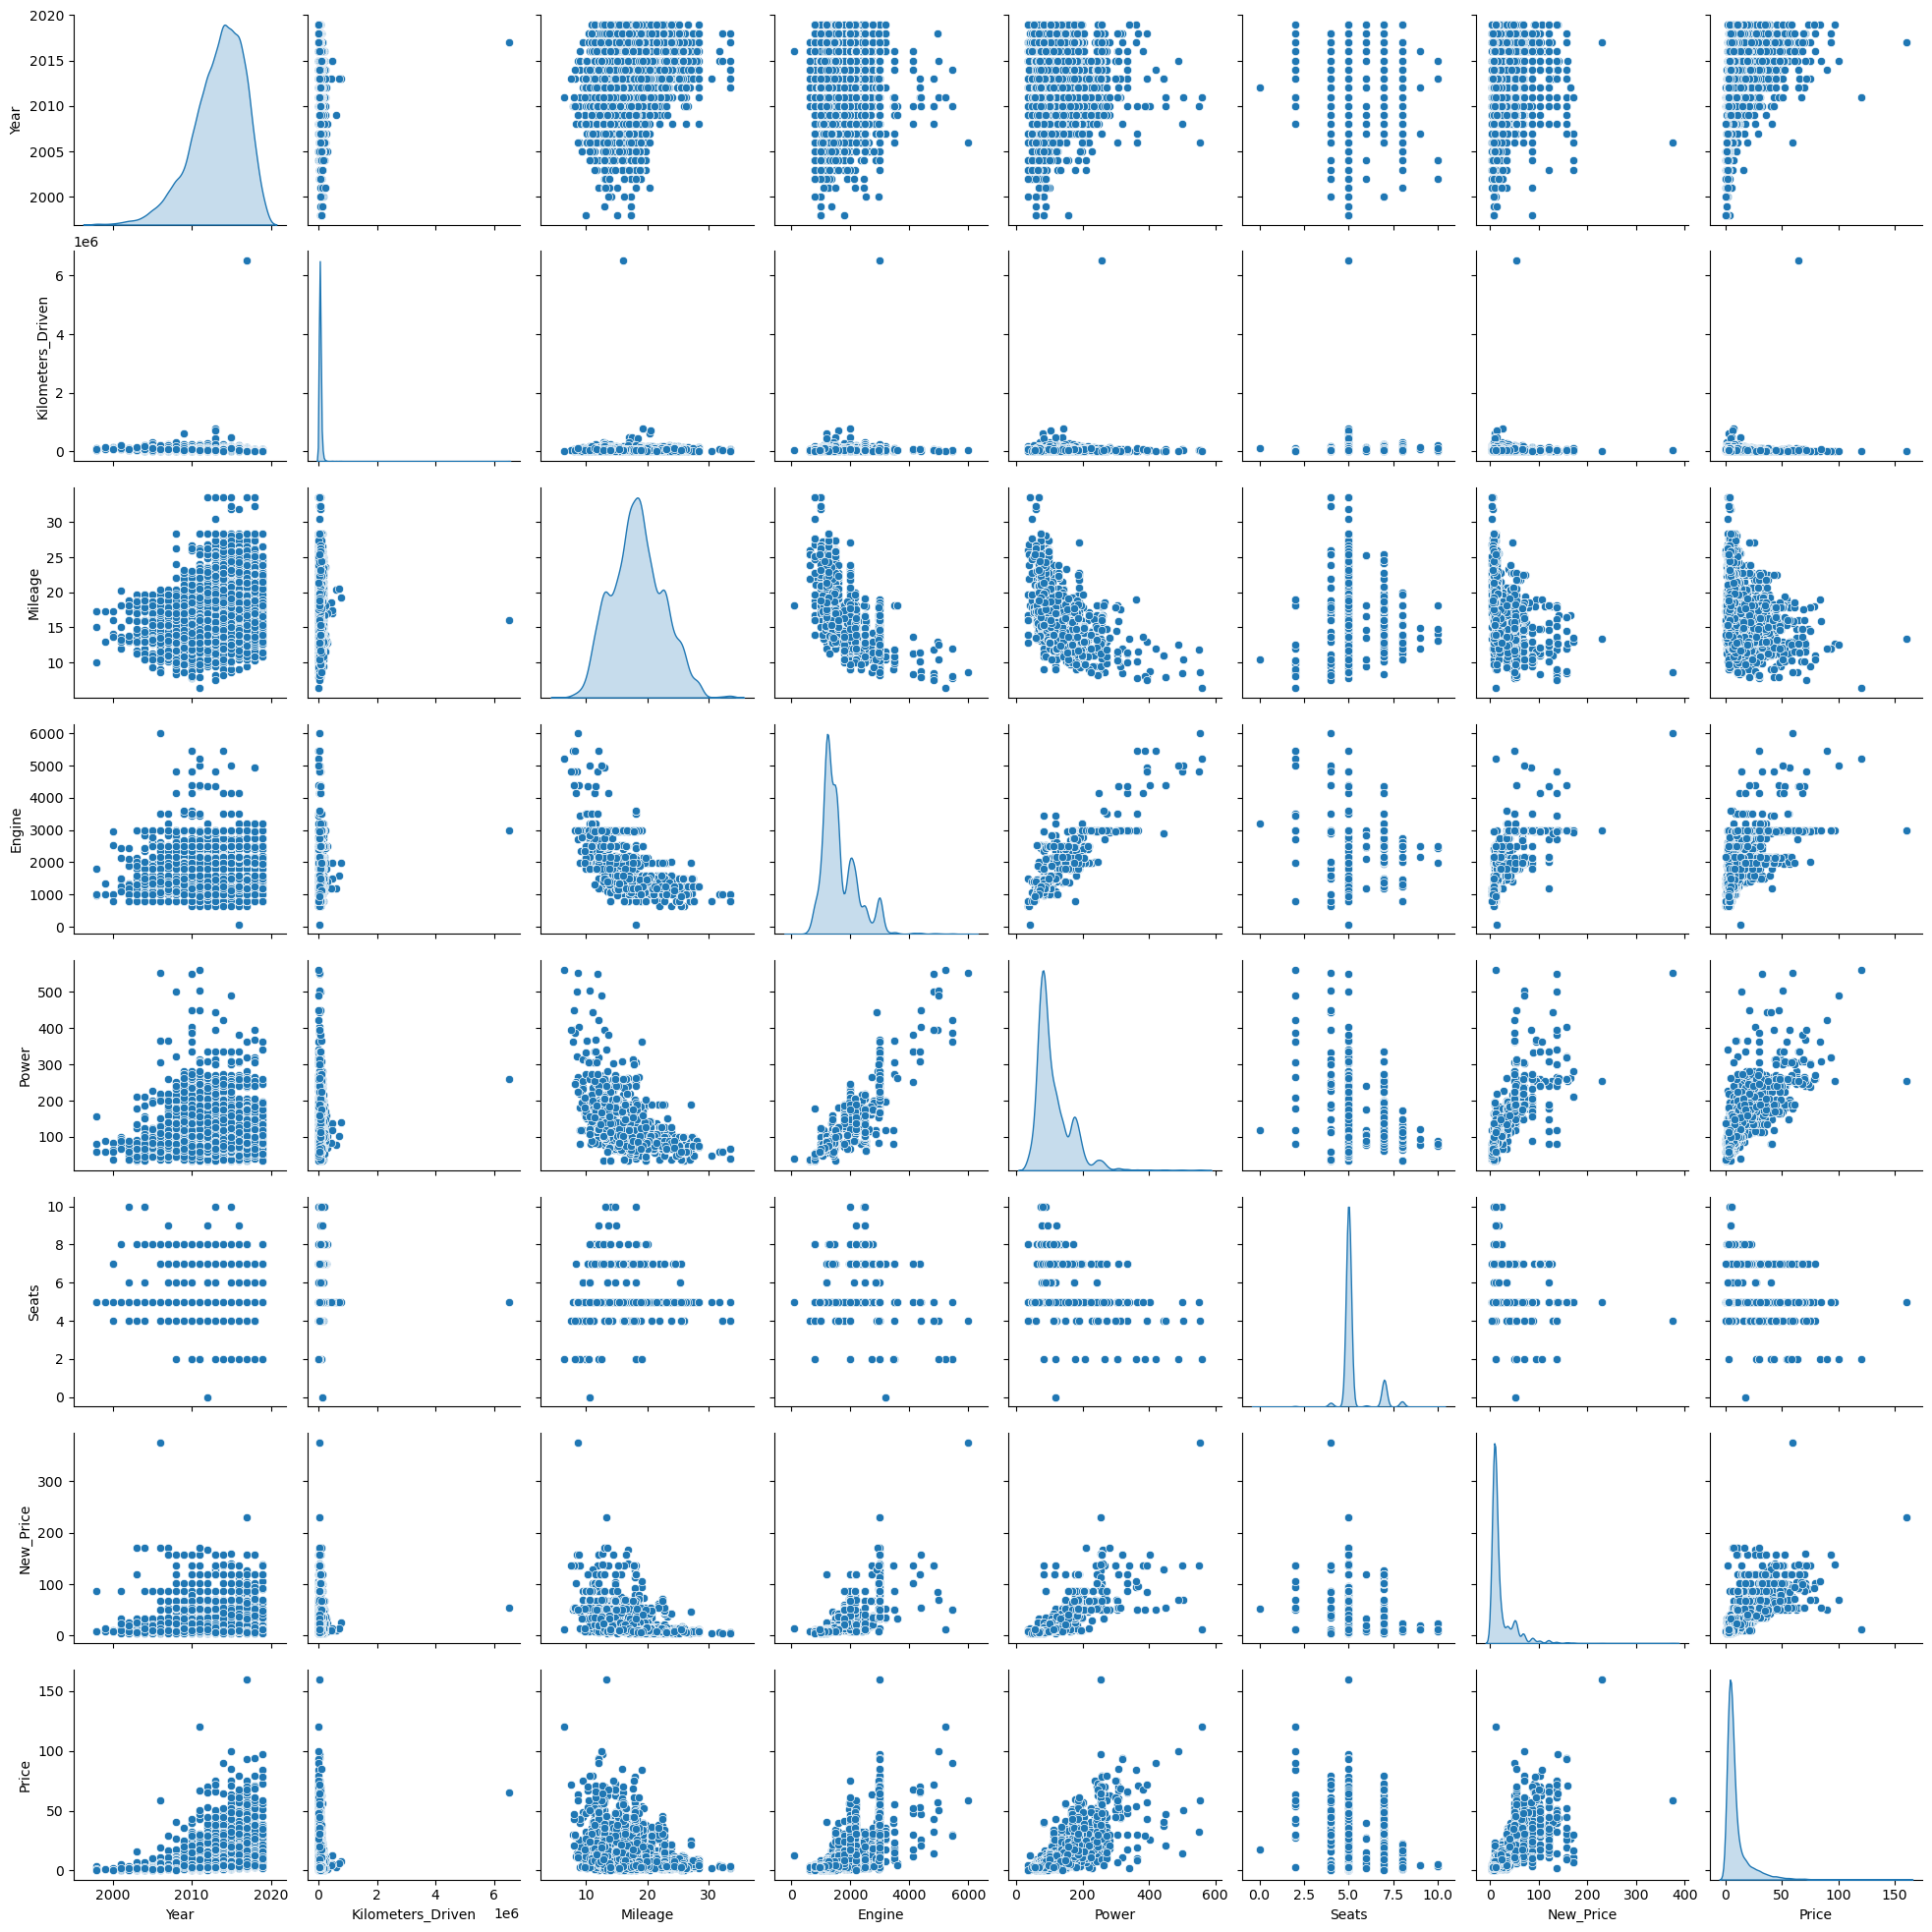

In [83]:
# pair plot with original variables

sns.pairplot(data=df[var],diag_kind='kde');

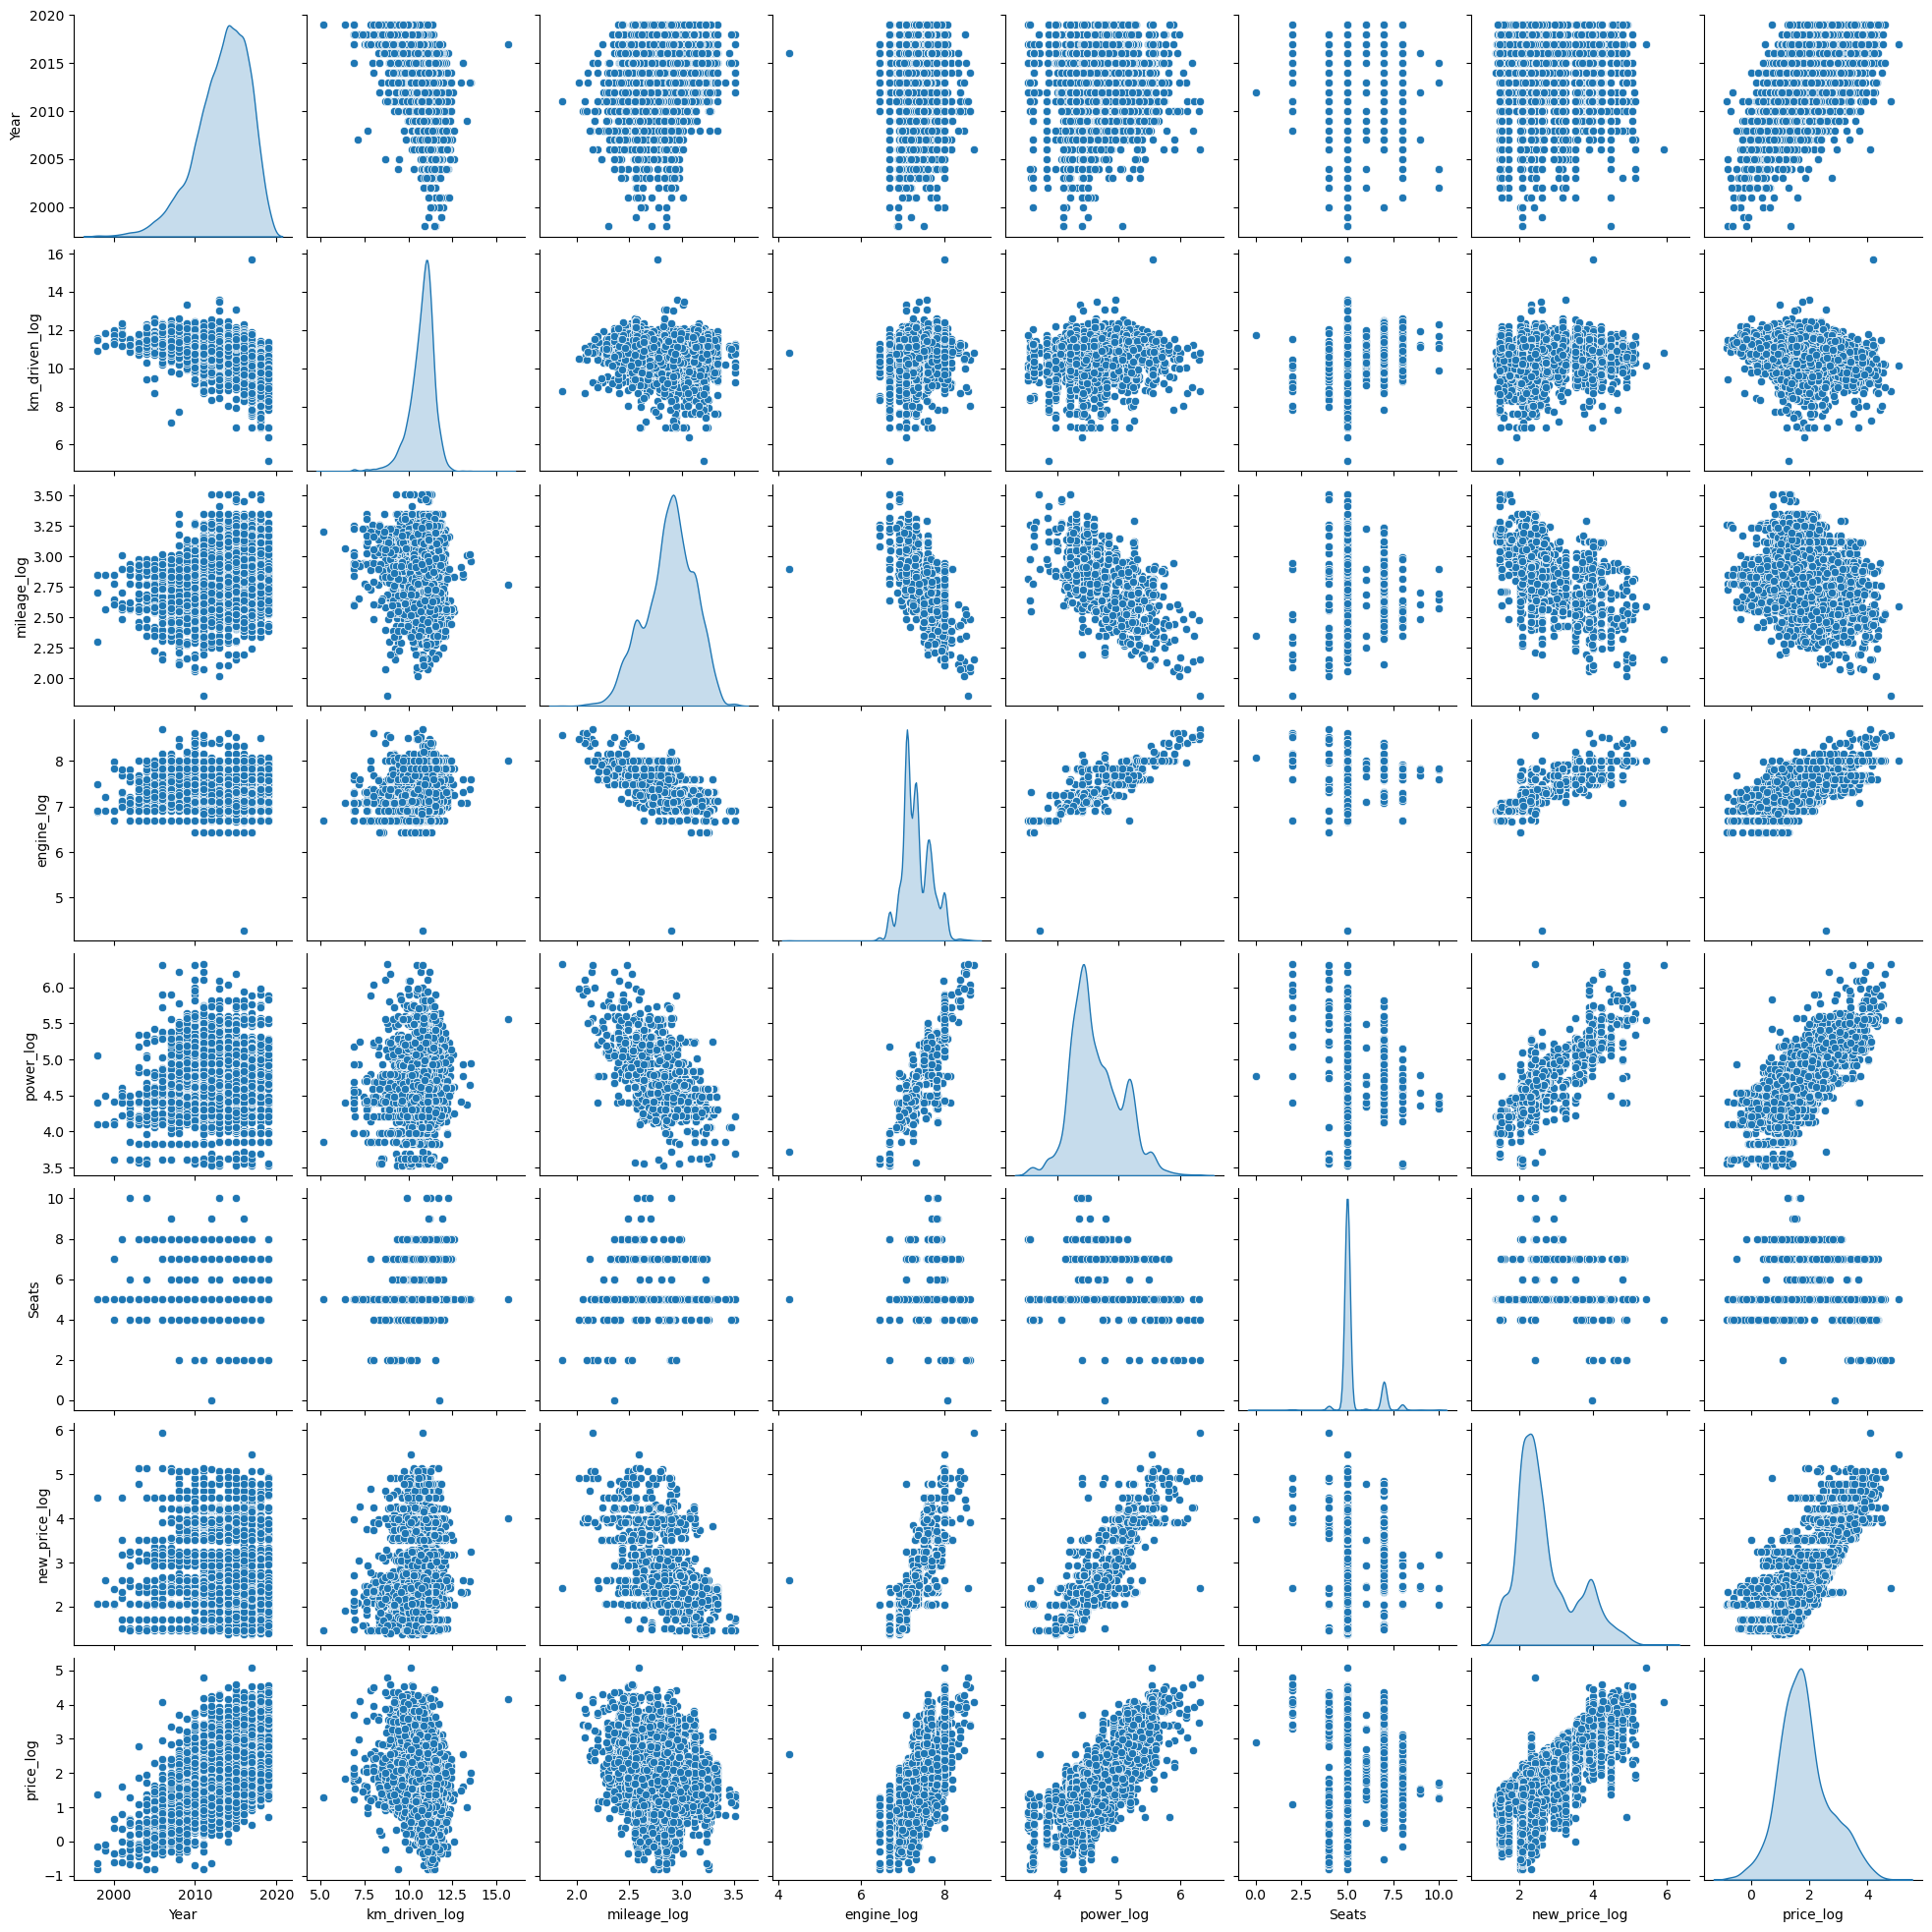

In [84]:
sns.pairplot(data=df[var_log],diag_kind='kde');

#### Model Building

In [85]:
# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [86]:
# function to compute adjusted R-squared
def adj_r2_score(X,y,y_hat):
    r2 = r2_score(y,y_hat)
    n = X.shape[0]
    k = X.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(y,y_hat):
    return np.mean(np.abs(y - y_hat) / y) * 100

# function for model performance
def model_performance(model,X,y):

    y_hat = model.predict(X)
    
    df_perf = pd.DataFrame({
        "RMSE":np.sqrt(mean_squared_error(y,y_hat)),
        "MAE":mean_absolute_error(y,y_hat),
        "R2":r2_score(y,y_hat),
        "Adj R2":adj_r2_score(X,y,y_hat),
        "MAPE":mape_score(y,y_hat)},index=["values"])
    print(df_perf)

### Model using original values

In [87]:
y = df['Price']
X = df[['Year','Kilometers_Driven','Mileage','Engine','Power','Seats','New_Price']]

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)
lr = LinearRegression()
lr.fit(x_train,y_train)
model_performance(lr,x_train,y_train)
model_performance(lr,x_test,y_test)

            RMSE       MAE       R2    Adj R2       MAPE
values  5.848353  3.265394  0.73251  0.732064  65.932029
            RMSE       MAE      R2    Adj R2       MAPE
values  6.019297  3.086303  0.6949  0.693712  59.926223


* $R^2$ are comparable for both train (0.73) and test data (0.69)
* RMSE values on the train and test sets are also comparable

### Model using log values

In [88]:
X_log = df[['Year','km_driven_log','mileage_log','engine_log','power_log','Seats','new_price_log']]
y_log = df['price_log']

x_train, x_test, y_train, y_test = train_test_split(X_log,y_log,test_size=0.30,random_state=1)
lr = LinearRegression()
lr.fit(x_train,y_train)
model_performance(lr,x_train,y_train)
model_performance(lr,x_test,y_test)

            RMSE      MAE        R2    Adj R2  MAPE
values  0.284603  0.20948  0.893541  0.893363   inf
            RMSE       MAE        R2    Adj R2  MAPE
values  0.268917  0.201845  0.906086  0.905721   inf


* $R^2$ are comparable for both train (0.89) and test data (0.90)
* RMSE values on the train and test sets are also comparable

### Overall Key Insights

Key Insights: 
* Top 5 Locations where cars are being sold or is available for purchase are Mumbai, Hyderabad, Kochi, Coimbatore & Pune. Although other cities like Delhi, Kolkata and Chennai have comparable markets
* Diesel (53.2%) and Petrol (45.6%) constitutes most of the sale. CNG, LPG and Electric sales are negligible
* Manual Car (71.4%) sales are way higher than Automatic Car Sales (28.6%)
* 81% of cars being sold or available for sale are having First Owner Type, followed by Second (16%). There are negligible cars having third and higher owner types
* Top 5 cars sold or available for sale which constitute around 60% of the total cars are:
    * Maruti
    * Hyundai
    * Honda
    * Toyota
    * Mercedes-Benz
* Very small number of cars (73 instances) where price of used car is greater than original price
* CNG car gives better mileage 
* Diesel cars have higher power
* Diesel cars have higher original prices as well as used car prices compared to other types of cars per the given data
* Manual cars offers higher mileage than Automatic transmission cars
* Automatic cars have higher power, higher price (both used car price as well as original price)
* Price is positively coorelated to new car price, power, engine and year
* Price is negatively coorelated to mileage
* In Mumbai, Pune, Kochi, Kolkata, people prefer Petrol cars over Diesel cars. All other location, Diesel cars are preferred over petrol cars
* Manual cars are sold more over Automatic transmission at all locations
* Owner Type of First dominates in all cities car sale

### Recommendations
- Company can focus on top 8 cities for used car sales - Mumbai, Hyderabad, Kochi, Coimbatore & Pune, Delhi, Kolkata and Chennai 
- Company can focus on Diesel cars as they are sold more than other types of cars
- Manual car sales more than Automatic cars, so company should keep higher manual cars in their inventory
- Company can focus on top 5 cars - Maruti, Hyundai, Honda, Toyota and Mercedes
- Traditional cars like Diesel and Petrol car sales dominates the market, other cars like CNG, Electric type are not so popular yet. Company should focus on Diesel and Petrol cars
- Few cities Mumbai, Pune, Kochi, Kolkata, people prefer Petrol cars over diesel cars, so company should keep more of petrol cars in their inventory, Other cities prefer Diesel cars

### Model Performance
* Model performance was improved by performing log transformation for some of the variables